In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#获取数据，数据基本信息
train_data = pd.read_csv("./titanic/train.csv")
test_data = pd.read_csv(r"./titanic/test.csv")
gender_data = pd.read_csv(r"./titanic/gender_submission.csv")
train_data.head()
# train_data.info()
# train_data.describe()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#训练数据描述
train_data.describe()
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

Index(['0', '1'], dtype='object')
Index(['1', '2', '3'], dtype='object')
female    233
male      109
Name: Sex, dtype: int64


male      468
female     81
Name: Sex, dtype: int64

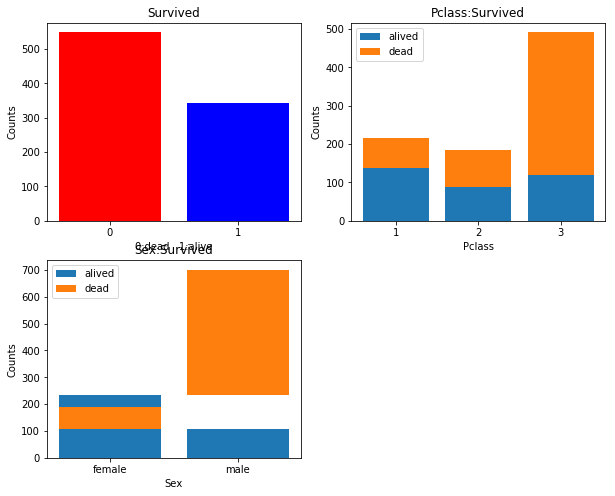

In [4]:
#个特征人数分布对存活的影响
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
survived_count = train_data.Survived.value_counts()
survived_count.index = ['0','1']
print(survived_count.index)
plt.bar(survived_count.index,height=survived_count,color=['red','blue'])
plt.xlabel('0:dead   1:alive')
plt.ylabel('Counts')
plt.title('Survived')
#船舱等级对获救的影响
plt.subplot(2,2,2)
pclass_alived=train_data.Pclass[train_data.Survived == 1].value_counts().sort_index()
pclass_alived.index=['1','2','3']
pclass_dead = train_data.Pclass[train_data.Survived == 0].value_counts().sort_index()
pclass_dead.index = ['1','2','3']
print(pclass_dead.index)
# print(pclass_dead)
p1 = plt.bar(pclass_alived.index,pclass_alived,label='alived')
p2 = plt.bar(pclass_dead.index,pclass_dead,bottom=pclass_alived,label='dead')#bottom参数必须为p1的数据
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.title('Pclass:Survived')
plt.legend()
#性别对获救的影响
plt.subplot(2,2,3)
sex_alived = train_data[train_data.Survived==1].Sex.value_counts()
sex_dead = train_data[train_data.Survived==0].Sex.value_counts()
sex_alived.sort_index()
sex_dead.sort_index()

plt.bar(sex_alived.index,sex_alived,label='alived')
plt.bar(sex_dead.index,sex_dead,bottom=sex_alived,label='dead')

plt.xlabel('Sex')
plt.ylabel('Counts')
plt.title('Sex:Survived')
plt.legend()
print(sex_alived)
sex_dead


In [5]:
#查看数据缺失值
total = train_data.isnull().sum().sort_values(ascending = False)
percent = round(total/len(train_data)*100,2)
pd.concat([total,percent],axis = 1,keys = ["total","percent"])

,total,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [6]:
#Embarked缺失值处理
print(train_data[train_data.Embarked.isnull()])
total = train_data.Embarked.value_counts(dropna=False)
percent = total/len(train_data)*100
pd.concat([total,percent],axis=1,keys=["total","percent"])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


,total,percent
S,644,72.278339
C,168,18.855219
Q,77,8.641975
NaN,2,0.224467


In [7]:
#缺失值处理
train_data = train_data[train_data.Embarked.notnull()]
train_data.Age.fillna(train_data.Age.mean(),inplace=True)
train_data.dropna(axis=1,inplace=True)
train_data.info()

test_data.Age.fillna(test_data.Age.mean(),inplace=True)
test_data.info()
#同时在gender_data数据中删除Fare为null的值
print(test_data[test_data.Fare.isnull()])
i = test_data[test_data.Fare.isnull()].index
gender_data.drop(i,inplace=True)

test_data = test_data[test_data.Fare.notnull()]
test_data.dropna(axis=1,inplace=True)

#train_data中Parch为0,1,2,3,4,5,6，test_data中Parch为0，1,2,3,4,5,6,9
print(train_data.Parch.value_counts())
print(test_data.Parch.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null objec

In [8]:
#特征值提取
train_df = train_data.drop(['PassengerId','Name','Ticket'],axis=1)
test_df = test_data.drop(['PassengerId','Name','Ticket'],axis=1)
#转换为one-hot码
train_dum_Pclass = pd.get_dummies(train_df.Pclass,prefix='Pclass')
train_dum_Sex = pd.get_dummies(train_df.Sex,prefix='Sex')
train_dum_SibSp = pd.get_dummies(train_df.SibSp,prefix = 'SibSp')
train_dum_Parch = pd.get_dummies(train_df.Parch,prefix = 'Parch')
train_dum_Embarked = pd.get_dummies(train_df.Embarked,prefix = 'Embarked')
train_new = pd.concat([train_df.Survived,train_dum_Pclass,train_dum_Sex,train_df.Age,train_dum_SibSp,train_dum_Parch,train_df.Fare,train_dum_Embarked],axis=1)
train_new.columns

test_dum_Pclass = pd.get_dummies(test_df.Pclass,prefix='Pclass')
test_dum_Sex = pd.get_dummies(test_df.Sex,prefix='Sex')
test_dum_SibSp = pd.get_dummies(test_df.SibSp,prefix = 'SibSp')
test_dum_Parch = pd.get_dummies(test_df.Parch,prefix = 'Parch')
test_dum_Embarked = pd.get_dummies(test_df.Embarked,prefix = 'Embarked')
test_new = pd.concat([test_dum_Pclass,test_dum_Sex,test_df.Age,test_dum_SibSp,test_dum_Parch,test_df.Fare,test_dum_Embarked],axis=1)
train_new.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,22.0,0,1,0,...,0,0,0,0,0,0,7.2500,0,0,1
1,1,1,0,0,1,0,38.0,0,1,0,...,0,0,0,0,0,0,71.2833,1,0,0
2,1,0,0,1,1,0,26.0,1,0,0,...,0,0,0,0,0,0,7.9250,0,0,1
3,1,1,0,0,1,0,35.0,0,1,0,...,0,0,0,0,0,0,53.1000,0,0,1
4,0,0,0,1,0,1,35.0,1,0,0,...,0,0,0,0,0,0,8.0500,0,0,1


In [9]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new.Age.values.reshape(-1,1))
train_new.Age = scaler.transform(train_new.Age.values.reshape(-1,1))
test_new.Age = scaler.transform(test_new.Age.values.reshape(-1,1))

scaler = StandardScaler()
scaler.fit(train_new.Fare.values.reshape(-1,1))
train_new.Fare = scaler.transform(train_new.Fare.values.reshape(-1,1))
test_new.Fare = scaler.transform(test_new.Fare.values.reshape(-1,1))

print(train_new.columns)
print(test_new.columns)

Index(['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Age', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [10]:
#建立模型，LogisticRegression
from sklearn.linear_model import LogisticRegression
# print(train_new.head())
train_x = train_new.drop(['Survived'],axis=1)
train_y = train_new.Survived
# print(train_y)
lg = LogisticRegression()
lg.fit(train_x,train_y)

#删除多余的Parch_9列
test_new.drop(['Parch_9'],axis=1,inplace=True)
lg.score(test_new,gender_data.Survived)



0.9376498800959233

In [11]:
y_test = lg.predict(test_new)

In [12]:
y_test.shape

(417,)